In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score,roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc, confusion_matrix,classification_report
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
import plotly.io as pio
from sklearn.model_selection import KFold
from sklearn.metrics import ConfusionMatrixDisplay

In [2]:
df4_train = pd.read_csv("Dataset-MobilePrice/df4_train.csv")
df4_test = pd.read_csv("Dataset-MobilePrice/df4_test.csv")

In [3]:
df4_test.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,mobile_wt,n_cores,pc,ram,talk_time,three_g,touch_screen,wifi
0,1043,1,1.8,1,14,0,5,193,3,16,3476,2,0,1,0
1,841,1,0.5,1,4,1,61,191,5,12,3895,7,1,0,0
2,1807,1,2.8,0,1,0,27,186,3,4,2396,10,0,1,1
3,1546,0,0.5,1,18,1,25,96,8,20,3893,7,1,1,0
4,1434,0,1.4,0,11,1,49,108,6,18,1773,7,1,0,1


In [6]:
true_num_cols = [
    'battery_power',
    'clock_speed',
    'fc',
    'int_memory',
    'mobile_wt',
    'pc',
    'ram',
    'talk_time'
]

In [7]:
true_cat_cols = [col for col in df4_test.columns if col not in true_num_cols]

In [8]:
for col in true_cat_cols:
    df4_test[col] = df4_test[col].astype('category')

In [9]:
cat_cols_test = list(df4_test.select_dtypes(include=['category']).columns)
num_cols_test = list(df4_test.select_dtypes(include=['int64', 'float64']).columns)

In [11]:
cat_cols_test

['blue', 'dual_sim', 'four_g', 'n_cores', 'three_g', 'touch_screen', 'wifi']

In [13]:
num_cols_test

['battery_power',
 'clock_speed',
 'fc',
 'int_memory',
 'mobile_wt',
 'pc',
 'ram',
 'talk_time']

In [15]:
df4_test.dtypes

battery_power       int64
blue             category
clock_speed       float64
dual_sim         category
fc                  int64
four_g           category
int_memory          int64
mobile_wt           int64
n_cores          category
pc                  int64
ram                 int64
talk_time           int64
three_g          category
touch_screen     category
wifi             category
dtype: object

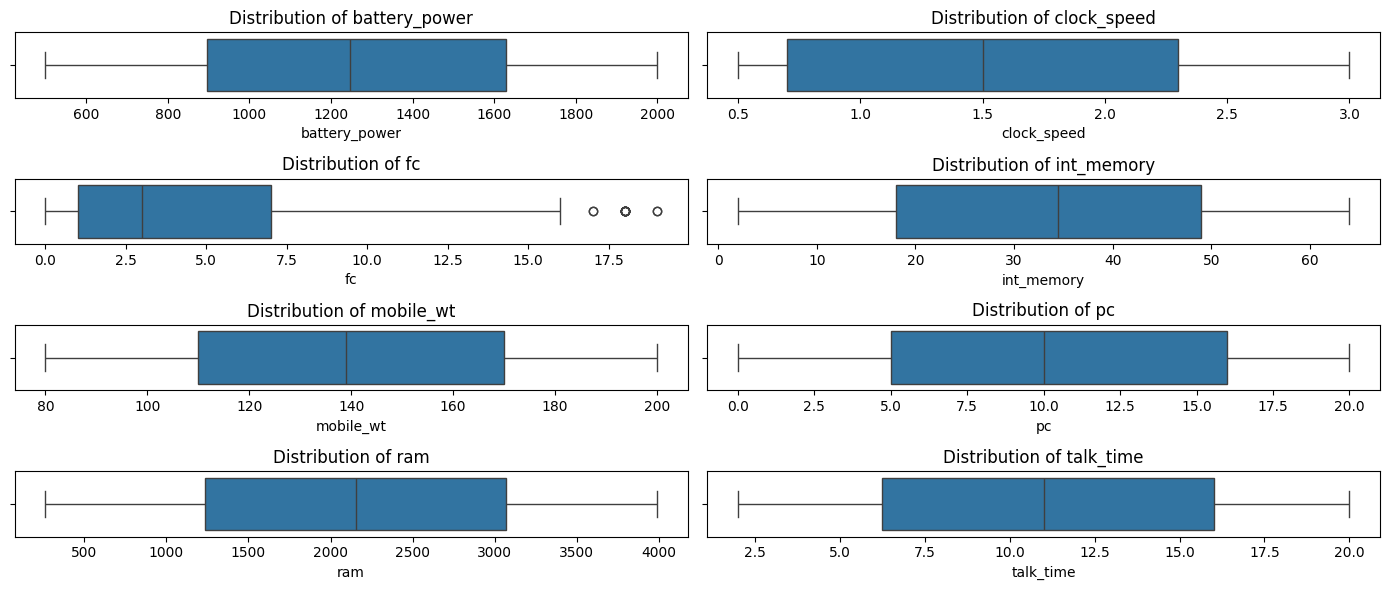

In [17]:
fig,axes=plt.subplots(4,2, figsize=(14,6))
axes=axes.flatten()
for i,col in enumerate(num_cols_test):
    sns.boxplot(data=df4_test, x=col, ax=axes[i])
    axes[i].set_title(f"Distribution of {col}")
for j in range(len(num_cols_test), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.savefig("Figures-Mobile Price/Test/Box Plot_num Cols.png", 
            dpi=300, bbox_inches='tight')
plt.show()

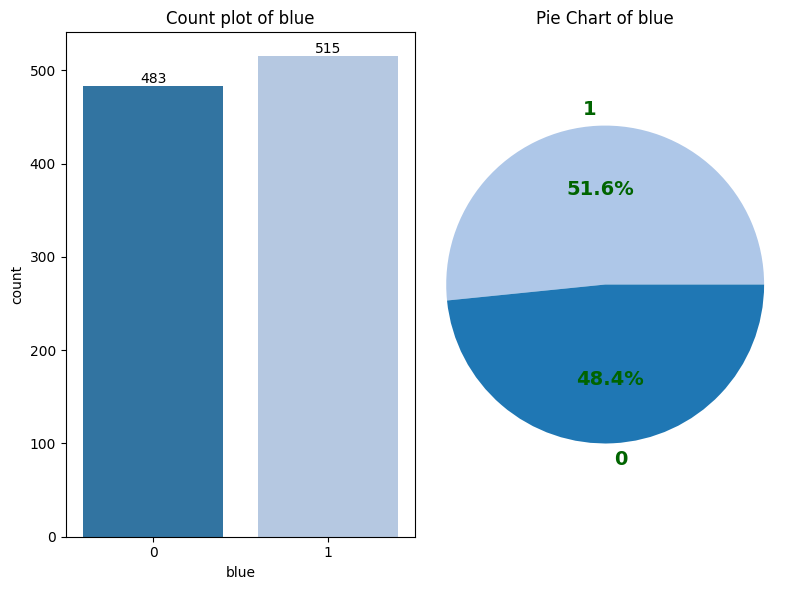

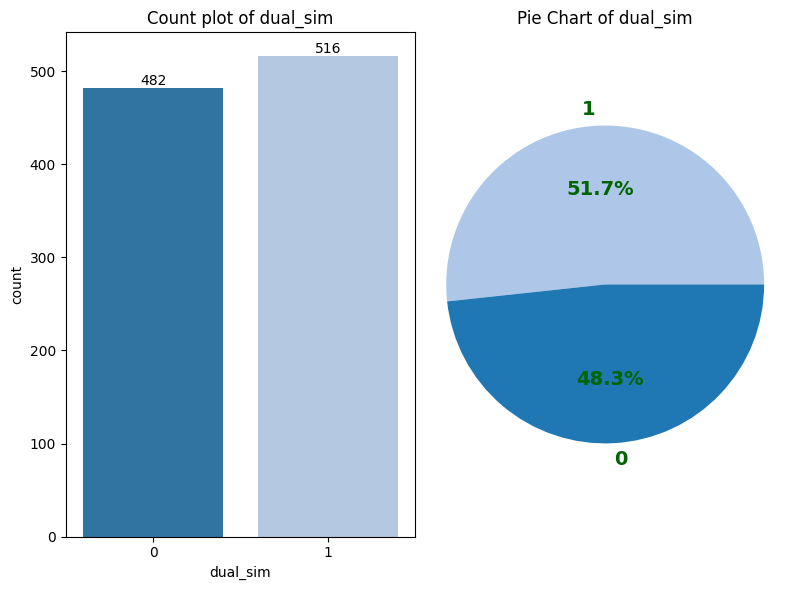

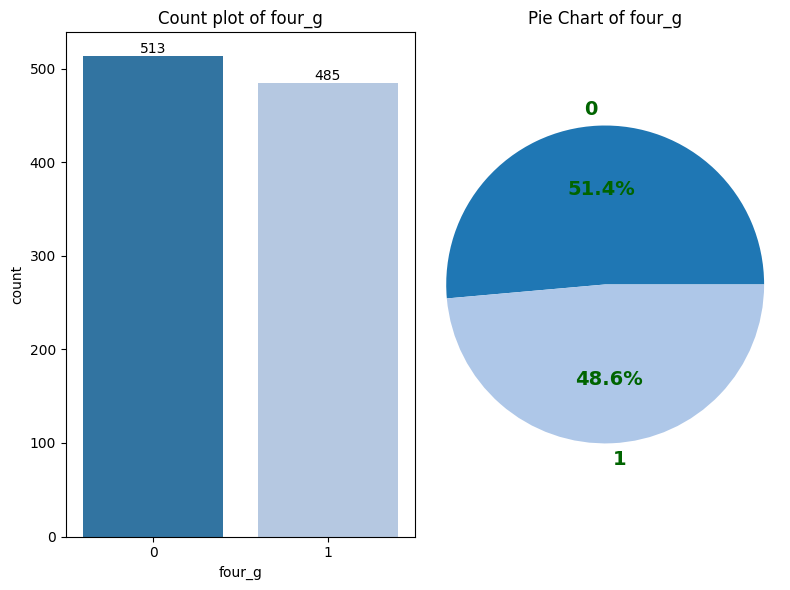

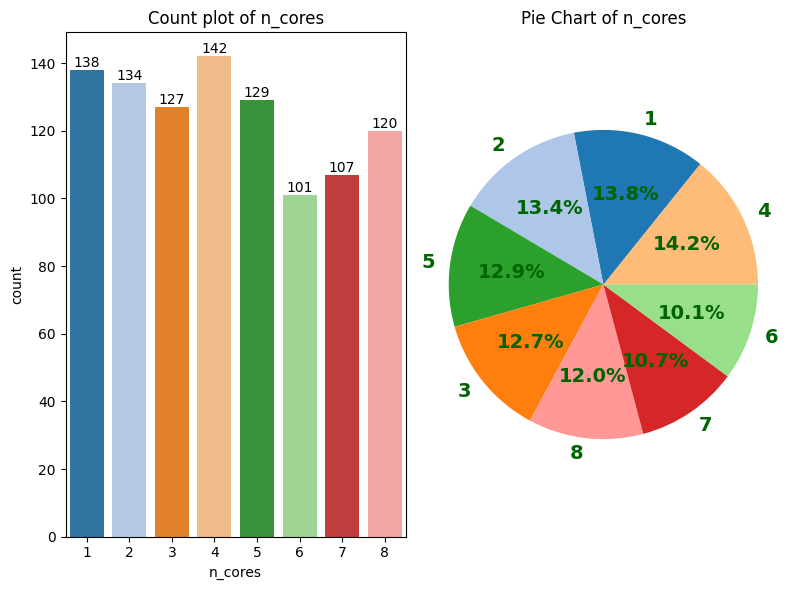

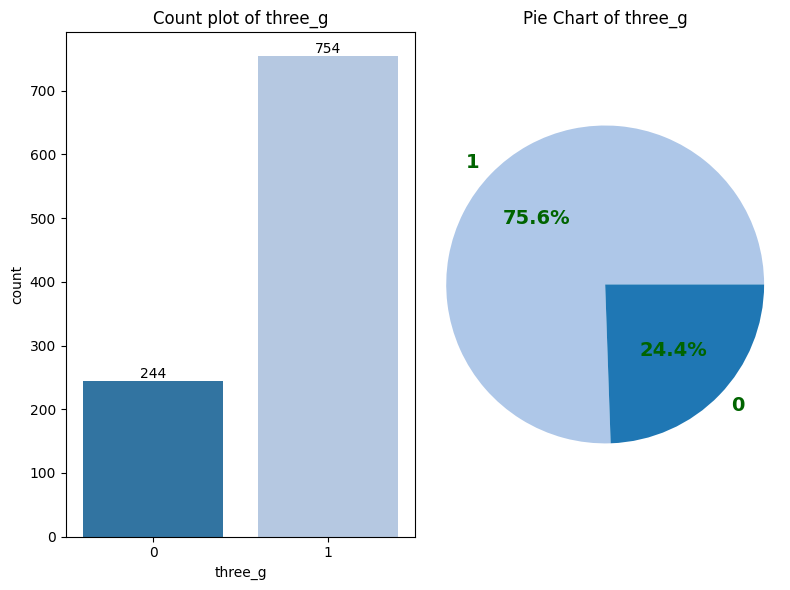

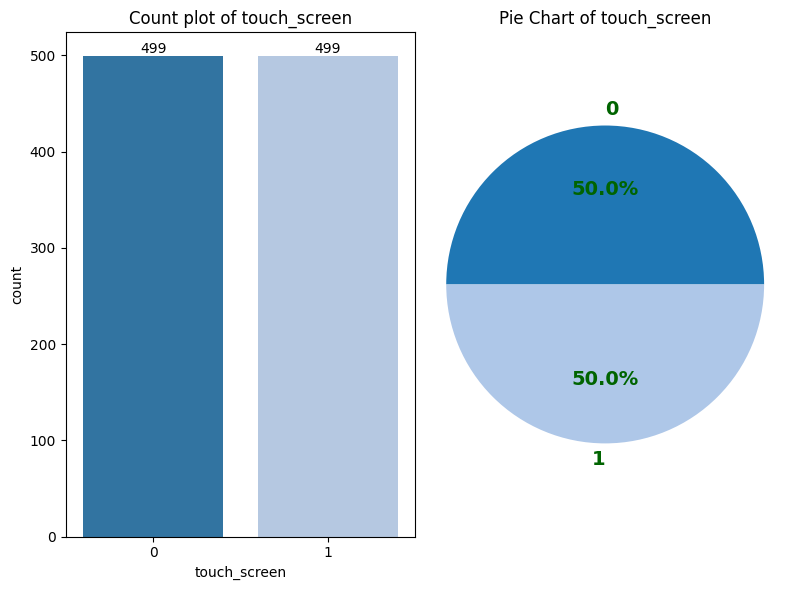

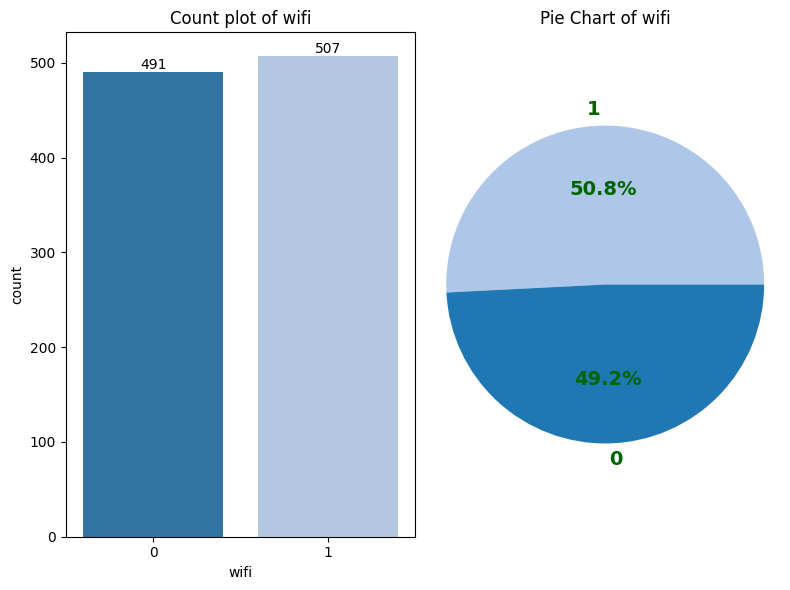

In [19]:
for col in cat_cols_test:
    fig, axes = plt.subplots(1, 2, figsize=(8, 6))
    categories = df4_test[col].dropna().unique()
    color_palette = sns.color_palette('tab20', len(categories))
    color_map = dict(zip(sorted(categories), color_palette))
    sns.countplot(data=df4_test, x=col, hue=col, ax=axes[0],
                  palette=color_map, legend=False)
    axes[0].set_title(f"Count plot of {col}")
    axes[0].tick_params(axis='x')
    for p in axes[0].patches:
        count = int(p.get_height())
        axes[0].annotate(f'{count}', (p.get_x() + p.get_width() / 2., p.get_height()),
                         ha='center', va='bottom')
    # Pie chart with same colors
    value_counts = df4_test[col].value_counts()
    pie_colors = [color_map[val] for val in value_counts.index]
    axes[1].pie(value_counts, labels=value_counts.index, autopct='%1.1f%%',
                startangle=0, colors=pie_colors,
                textprops={'color': 'darkgreen', 'fontsize': 14, 'fontweight': 'bold'})
    axes[1].set_title(f"Pie Chart of {col}")
    axes[1].axis('equal')

    plt.tight_layout()
    plt.savefig(f"Figures-Mobile Price/Test/CountPlot_{col}.png",
            dpi=300, bbox_inches='tight')
    plt.show()

The categorical distribution in the test dataset is generally balanced across groups. However, within the '3G' category, approximately one-fourth of the entries lack 3G data, indicating a notable gap in coverage or availability specific to this group.

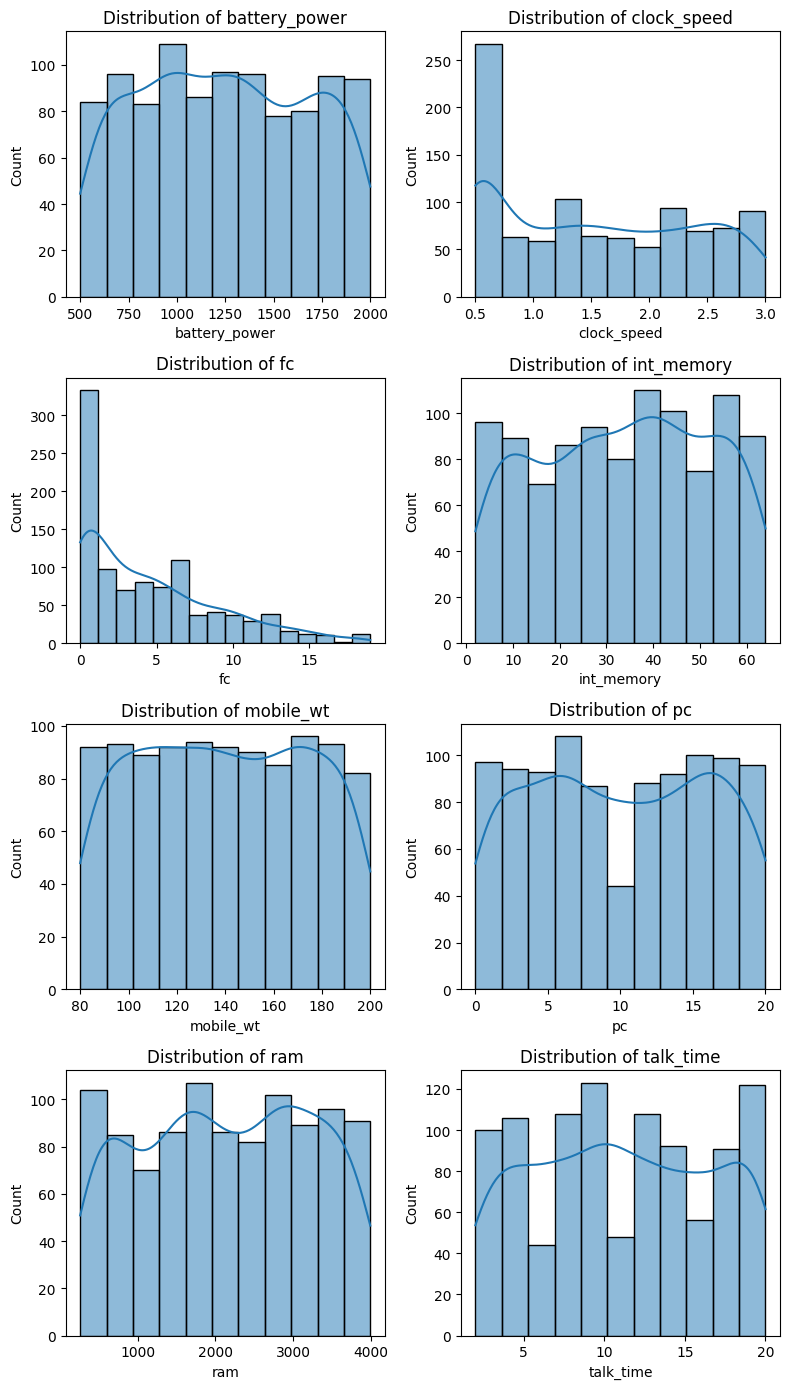

In [20]:
fig,axes=plt.subplots(4,2,figsize=(8,14))
axes=axes.flatten()
for i,col in enumerate(num_cols_test):
    sns.histplot(data=df4_test, x=col, kde=True, ax=axes[i])
    axes[i].set_title(f"Distribution of {col}")

plt.tight_layout()
plt.savefig("Figures-Mobile Price/Test/Distribution_num_cols.png", 
            dpi=300, bbox_inches='tight')
plt.show()

We observed similar patterns to the train dataset. Most of the numerical columns are normally distributed, and fc and clock-speed are left-skewed.